# Pathway associated gene expression heatmap

This notebook will use heatmaps to visualize the gene expression for selected genes that correspond to selected pathways. These pathways have been selected for their roles in tumor proliferation and chemotherapy resistance.

1. Tumor Proliferation
    1. G2/M Cell Cycle Checkpoint
    2. E2F Regulation
2. Chemotherapy Resistance
    1. DNA Damage Response (DDR)
    2. Unfolded Protein Response (UPR)

For these heatmaps, the combined epethilial dataset does **not** filter out the following:

* Stromal cells
   * This cell type is located in connective tissues. [9]
   * "Source of cancer-associated fibroblasts" [9, 10]
* Genes with low variance across cells
   * The two types of cells being analyzed have different descriptive statistics which contributes to the likelihood that filtering out highly variable genes for each of these groups will be more difficult to compare.
   * The interest in this notebook is biolical signifcance and/or relevance. Keeping these genes ensures that key insights aren't missed just because they don't drive variance across all the cells.


## 0. Initializations

In [1]:
# -- imports --
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from signals_in_the_noise.preprocessing.gse161529 import GSE161529
from signals_in_the_noise.utilities.storage import get_resources_path
from signals_in_the_noise.utilities.visualization import get_figure_axes

In [2]:
# -- datasets --
gse = GSE161529()

2025-08-01 22:53:45,706 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-08-01 22:53:45,801 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-08-01 22:53:45,968 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-08-01 22:53:46,026 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-08-01 22:53:46,185 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

In [3]:
all_real, all_noise = gse.get_combined_epithilial_dataset(
    real_filename="combined_epi_normal_pathway_real.h5ad",
    noise_filename="combined_epi_normal_pathway_noise.h5ad",
    remove_stromal=False,
)

2025-08-01 22:53:52,942 [INFO] signals_in_the_noise.preprocessing.gse161529: Combining datasets...


Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...
Log normalizing dataset...


... storing 'adata-filename' as categorical
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical
... storing 'cancer_type' as categorical
... storing 'cell_population' as categorical
... storing 'gender' as categorical
... storing 'parity' as categorical
... storing 'adata-filename' as categorical
... storing 'predicted_type' as categorical
... storing 'specimen_id' as categorical
... storing 'hormonal_status' as categorical
... storing 'cancer_type' as categorical
... storing 'cell_population' as categorical
... storing 'gender' as categorical
... storing 'parity' as categorical


## 1. Raw gene expressions

First, generate a heatmaps from the raw expression of selected genes from each of the pathways. Below is a list of the selected genes and the reference article used for choosing the genes for the pathway.

1. Tumor Proliferation
    1. G2/M Cell Cycle Checkpoint
        1. CDC25C; CDK1; PLK1; AURKA; WEE1. Kai Liu, et al. [4]
    1. E2F Regulation
        1. CDK1; CCNA2; E2F1; E2F2.  Zeyu Xing, et. al. [5]
2. Chemotherapy Resistance
    2. DNA Damage Response (DDR)
        2. BRCA1/BRCA2; RAD51; ATM; CHEK2; XRCC1. Emily Cybulla, et al. [6]
    2. Unfolded Protein Response (UPR)
        2. ATF6; XBP1; CHOP; GRP78 (BiP).; PERK [7]

During the secondary preprocessing for combining the epithilial datasets, a read-only snapshot of the expression was created before any filtering and joining.

In [4]:
tumor_proliferation_genes = list(gse.G2M_CHECKPOINT_GENES.values())
tumor_proliferation_genes.extend(list(gse.E2F_REGULATION_GENES.values()))

chemo_resistance_genes = list(gse.DDR_GENES.values())
chemo_resistance_genes.extend(list(gse.UPR_GENES.values()))

### 1.a. Tumor Proliferation Genes

#### 1.a.i. "Real" cells

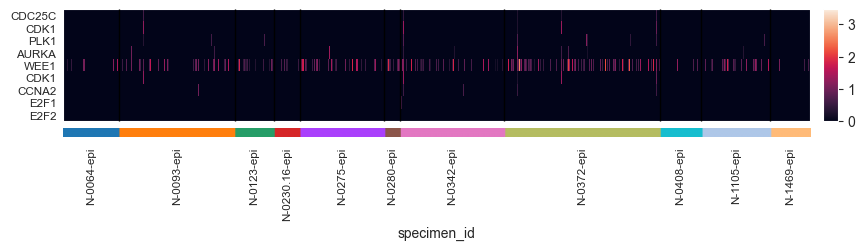

In [5]:
sc.pl.heatmap(
    all_real,
    var_names=tumor_proliferation_genes,
    groupby='specimen_id',
    use_raw=True,
    swap_axes=True,
    show=True,
)

#### 1.a.ii. "Noise" cells

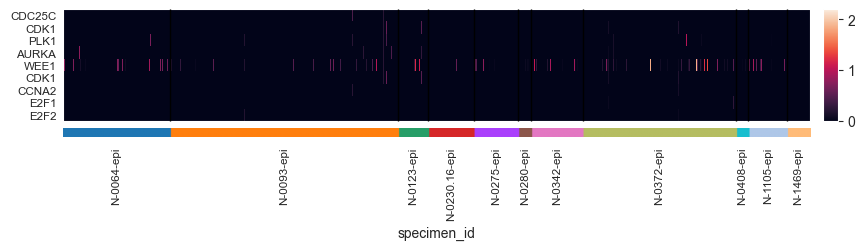

In [6]:
sc.pl.heatmap(
    all_noise,
    var_names=tumor_proliferation_genes,
    groupby='specimen_id',
    use_raw=True,
    swap_axes=True,
    show=True,
)

### 1.b. Chemotherapy Resistance genes

#### 1.b.i. "Real" cells

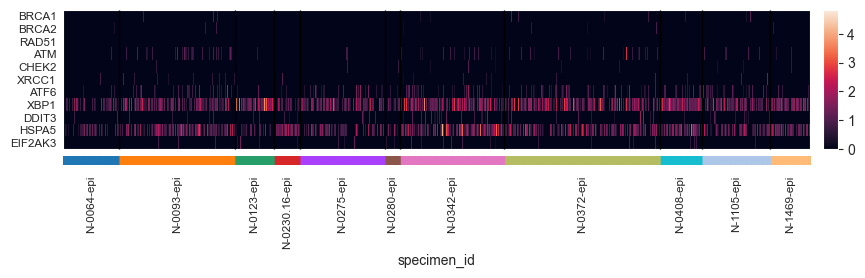

In [7]:
sc.pl.heatmap(
    all_real,
    var_names=chemo_resistance_genes,
    groupby='specimen_id',
    use_raw=True,
    swap_axes=True,
    show=True,
)

#### 1.b.ii. "Noise" cells

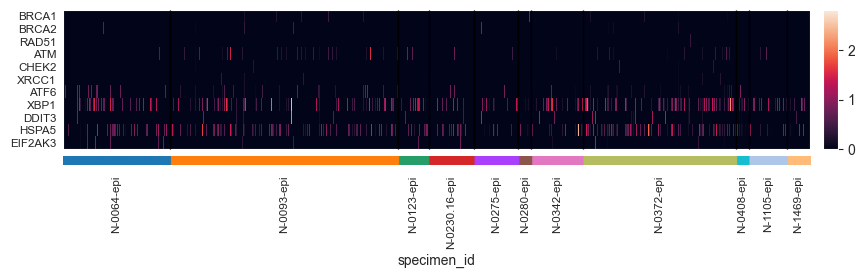

In [14]:
sc.pl.heatmap(
    all_noise,
    var_names=chemo_resistance_genes,
    groupby='specimen_id',
    use_raw=True,
    swap_axes=True,
    show=True,
)

## 2. Average gene expressions

Using `scanpy.tl.score_genes`, calculate the average expression of the genes of interest.

### 2.a. "Real" cells

In [17]:
sc.tl.score_genes(
    all_real,
    gene_list=tumor_proliferation_genes,
    score_name='tp_score',
    use_raw=True,
)
sc.tl.score_genes(
    all_real,
    gene_list=chemo_resistance_genes,
    score_name='cr_score',
    use_raw=True,
)

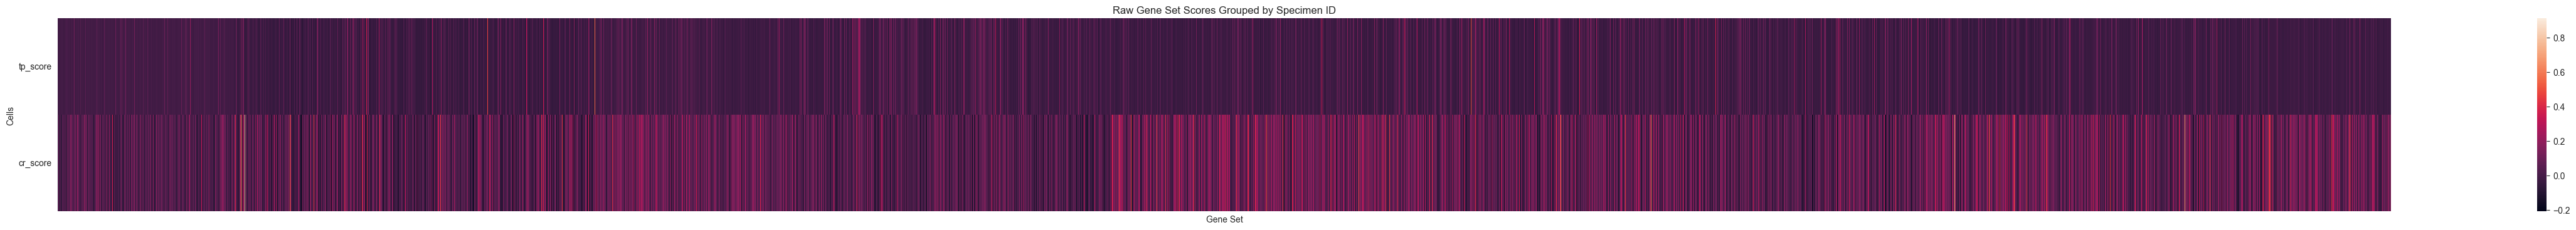

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

scores = all_real.obs[['tp_score', 'cr_score']]
specimen_ids = all_real.obs['specimen_id']

sorted_idx = specimen_ids.sort_values().index
sorted_scores = scores.loc[sorted_idx]
sorted_specimen = specimen_ids[sorted_idx]

# figure needs to be REALLY wide to see the color differences
plt.figure(figsize=(60, 4))
ax = sns.heatmap(
    sorted_scores.T,
    cmap='rocket',
    square=True,
    xticklabels=False,
)

plt.gca().set_aspect('auto')
plt.title("Raw Gene Set Scores Grouped by Specimen ID")
plt.xlabel("Gene Set")
plt.ylabel("Cells")
plt.show()

### 2.b. "Noise" cells

In [66]:
sc.tl.score_genes(
    all_noise,
    gene_list=tumor_proliferation_genes,
    score_name='tp_score',
    use_raw=True,
)
sc.tl.score_genes(
    all_noise,
    gene_list=chemo_resistance_genes,
    score_name='cr_score',
    use_raw=True,
)

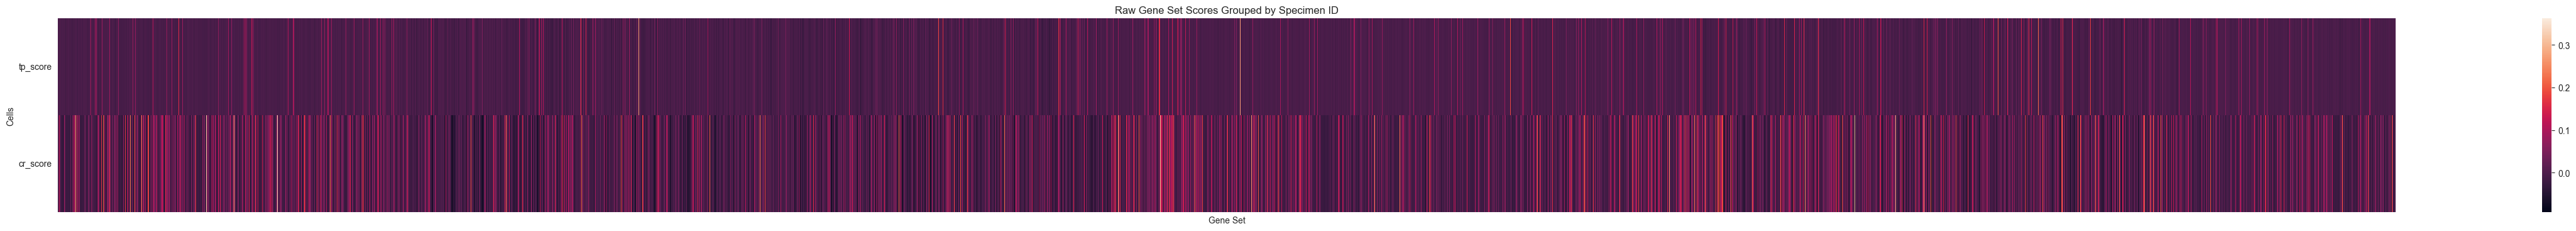

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

scores = all_noise.obs[['tp_score', 'cr_score']]
specimen_ids = all_noise.obs['specimen_id']

sorted_idx = specimen_ids.sort_values().index
sorted_scores = scores.loc[sorted_idx]
sorted_specimen = specimen_ids[sorted_idx]

# figure needs to be REALLY wide to see the color differences
plt.figure(figsize=(60, 4))
ax = sns.heatmap(
    sorted_scores.T,
    cmap='rocket',
    square=True,
    xticklabels=False,
)

plt.gca().set_aspect('auto')
plt.title("Raw Gene Set Scores Grouped by Specimen ID")
plt.xlabel("Gene Set")
plt.ylabel("Cells")
plt.show()